In [147]:
numbers = [1, 2, 3, 4, 5]
squared_numbers =  [x**2 for x in numbers]# TODO: YOUR CODE HERE
print(squared_numbers)

[1, 4, 9, 16, 25]


In [148]:
students = {'Alice': 85, 'Bob': 67, 'Charlie': 72, 'David': 90}
passed_students = dict((k,v) for k, v in students.items() if v >=70)# TODO: YOUR CODE HERE
print(passed_students)

{'Alice': 85, 'Charlie': 72, 'David': 90}


In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rc('font',family='Malgun Gothic')

In [150]:
pay_as_you_go_bag = pd.read_csv("../data/240708.csv", encoding="euc-kr")
pay_as_you_go_bag_df = pay_as_you_go_bag.copy()
pay_as_you_go_bag_df.head(3)

,시도명,시군구명,종량제봉투종류,종량제봉투처리방식,종량제봉투용도,종량제봉투사용대상,1ℓ가격,1.5ℓ가격,2ℓ가격,2.5ℓ가격,...,60ℓ가격,75ℓ가격,100ℓ가격,120ℓ가격,125ℓ가격,관리부서명,관리부서전화번호,데이터기준일자,제공기관코드,제공기관명
0,부산광역시,사상구,재사용규격봉투,소각용,생활쓰레기,가정용,0,0,0,0,...,0,0,0,0,0,청소행정과,051-310-4335,2023-06-27,3390000,부산광역시 사상구
1,부산광역시,사상구,규격봉투,소각용,생활쓰레기,사업장용,0,0,0,0,...,0,3530,0,0,0,청소행정과,051-310-4335,2023-06-27,3390000,부산광역시 사상구
2,부산광역시,사상구,규격봉투,매립용,생활쓰레기,기타,0,0,0,0,...,0,0,0,0,0,청소행정과,051-310-4335,2023-06-27,3390000,부산광역시 사상구


In [151]:
pay_as_you_go_bag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시도명        664 non-null    object
 1   시군구명       664 non-null    object
 2   종량제봉투종류    664 non-null    object
 3   종량제봉투처리방식  664 non-null    object
 4   종량제봉투용도    664 non-null    object
 5   종량제봉투사용대상  664 non-null    object
 6   1ℓ가격       664 non-null    int64 
 7   1.5ℓ가격     664 non-null    int64 
 8   2ℓ가격       664 non-null    int64 
 9   2.5ℓ가격     664 non-null    int64 
 10  3ℓ가격       664 non-null    int64 
 11  5ℓ가격       664 non-null    int64 
 12  10ℓ가격      664 non-null    int64 
 13  20ℓ가격      664 non-null    int64 
 14  30ℓ가격      664 non-null    int64 
 15  50ℓ가격      664 non-null    int64 
 16  60ℓ가격      664 non-null    int64 
 17  75ℓ가격      664 non-null    int64 
 18  100ℓ가격     664 non-null    int64 
 19  120ℓ가격     664 non-null    int64 
 20  125ℓ가격     664 non-null    int64

In [152]:
print("### Feature type ###")
print(pay_as_you_go_bag_df.iloc[:,:-1].dtypes.value_counts())

print("\n### Null Feature ###")
isnull_series = pay_as_you_go_bag_df.isnull().sum()
print(isnull_series[isnull_series >0].sort_values(ascending=False))

### Feature type ###
int64     15
object    10
Name: count, dtype: int64

### Null Feature ###
Series([], dtype: int64)


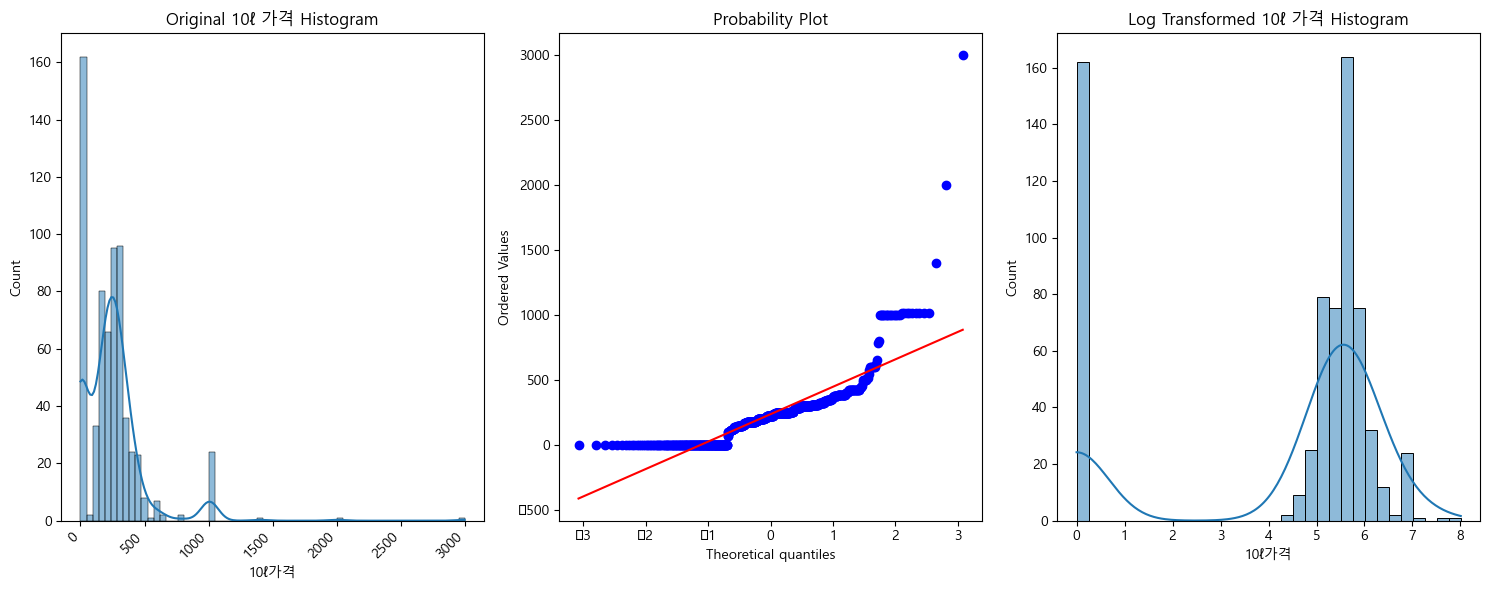

In [153]:
from scipy import stats

fig, axs = plt.subplots(1,3, figsize = (15,6))

sns.histplot(pay_as_you_go_bag_df["10ℓ가격"], ax = axs[0], kde=True)
stats.probplot(pay_as_you_go_bag_df["10ℓ가격"], dist='norm', fit=True, plot=axs[1])
sns.histplot(np.log1p(pay_as_you_go_bag_df["10ℓ가격"]), ax=axs[2], kde=True)

axs[0].set_title("Original 10ℓ 가격 Histogram")
axs[2].set_title("Log Transformed 10ℓ 가격 Histogram")

for label in axs[0].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

plt.tight_layout()
plt.show()

In [154]:
# 값이 0원인 것들은 결측치로 변경
int_columns = pay_as_you_go_bag_df.select_dtypes(include=['int64']).columns
pay_as_you_go_bag_df[int_columns] = pay_as_you_go_bag_df[int_columns].replace(0, np.nan)

In [155]:
print("### Feature type ###")
print(pay_as_you_go_bag_df.iloc[:,:-1].dtypes.value_counts())

print("\n### Null Feature ###")
isnull_series = pay_as_you_go_bag_df.isnull().sum()
print(isnull_series[isnull_series >0].sort_values(ascending=False))

### Feature type ###
float64    15
object     10
Name: count, dtype: int64

### Null Feature ###
2.5ℓ가격    660
120ℓ가격    660
1.5ℓ가격    658
125ℓ가격    658
60ℓ가격     650
1ℓ가격      600
100ℓ가격    599
2ℓ가격      585
30ℓ가격     506
3ℓ가격      483
75ℓ가격     413
50ℓ가격     282
5ℓ가격      281
10ℓ가격     162
20ℓ가격     117
dtype: int64


In [156]:
# Null 데이터가 500개 이상인 피처 제거
pay_as_you_go_bag_df.drop(["2.5ℓ가격", "120ℓ가격" ,"1.5ℓ가격" ,"125ℓ가격" ,"60ℓ가격" ,"1ℓ가격" ,"100ℓ가격" ,"2ℓ가격","30ℓ가격", "관리부서명", "관리부서전화번호", "제공기관코드", "제공기관명", "데이터기준일자", "시군구명" ,"종량제봉투종류" ,"종량제봉투처리방식" ,"종량제봉투용도" ,"종량제봉투사용대상", '3ℓ가격', '5ℓ가격', '20ℓ가격', '50ℓ가격', '75ℓ가격'], axis=1, inplace=True)

# 종속 변수 로그 변환
price = pay_as_you_go_bag_df["10ℓ가격"]
pay_as_you_go_bag_df["10ℓ가격"] = np.log1p(pay_as_you_go_bag_df["10ℓ가격"])

In [157]:
# 결측값 대체
numeric_cols = pay_as_you_go_bag_df.select_dtypes(include=[np.number]).columns
pay_as_you_go_bag_df[numeric_cols] = pay_as_you_go_bag_df[numeric_cols].fillna(pay_as_you_go_bag_df[numeric_cols].mean())

In [158]:
# 원-핫 인코딩
pay_as_you_go_bag_df_ohe = pd.get_dummies(pay_as_you_go_bag_df)

print(pay_as_you_go_bag_df_ohe.head())

      10ℓ가격  시도명_강원도  시도명_강원특별자치도  시도명_경기도  시도명_경상남도  시도명_경상북도  시도명_광주광역시  \
0  5.831882    False        False    False     False     False      False   
1  5.619041    False        False    False     False     False      False   
2  5.619041    False        False    False     False     False      False   
3  5.619041    False        False    False     False     False      False   
4  5.802118    False        False    False     False     False      False   

   시도명_대구광역시  시도명_대전광역시  시도명_부산광역시  시도명_서울특별시  시도명_세종특별자치시  시도명_울산광역시  \
0      False      False       True      False        False      False   
1      False      False       True      False        False      False   
2      False      False       True      False        False      False   
3      False      False       True      False        False      False   
4      False       True      False      False        False      False   

   시도명_인천광역시  시도명_전라남도  시도명_전라북도  시도명_전북특별자치도  시도명_제주특별자치도  시도명_충청남도  시도명_충청북도  
0      False     

In [159]:
print("원-핫 인코딩 전 shape:", pay_as_you_go_bag_df.shape)
print("원-핫 인코딩 후 shape:", pay_as_you_go_bag_df_ohe.shape)

원-핫 인코딩 전 shape: (664, 2)
원-핫 인코딩 후 shape: (664, 20)


In [160]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(f'{model.__class__.__name__} 로그 변환된 RMSE: {np.round(rmse, 4)}')
    
    return rmse

def get_rmses(models):
    rmses = []
    
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
        
    return rmses

In [161]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_features = pay_as_you_go_bag_df_ohe.drop(['10ℓ가격'], axis=1, inplace=False)
y_target = pay_as_you_go_bag_df_ohe['10ℓ가격']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

lr_reg = LinearRegression() # TODO: YOUR_CODE_HERE
ridge_reg = Ridge() # TODO: YOUR_CODE_HERE
lasso_reg = Lasso() # TODO: YOUR_CODE_HERE

lr_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# 예측 평가
models = [lr_reg, ridge_reg, lasso_reg]
rmses = get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.3868
Ridge 로그 변환된 RMSE: 0.3854
Lasso 로그 변환된 RMSE: 0.4628


In [162]:
# 상위, 하위 10개 coeffictients 추출
def get_top_bottom_coef(model):
    # coef series
    coef = pd.Series(model.coef_, index = X_features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

# 회귀 계수 시각화
def visualize_coefficient(models, xlim=None):
    fig, axs = plt.subplots(3, 1, figsize=(24, 20))
    fig.tight_layout()
    
    for i, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low], axis=0)
        
        axs[i].set_title(model.__class__.__name__, size=24, x= 0.9, y= 0.1)
        
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)
            
        if xlim:
            axs[i].set_xlim(xlim)
            
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i])

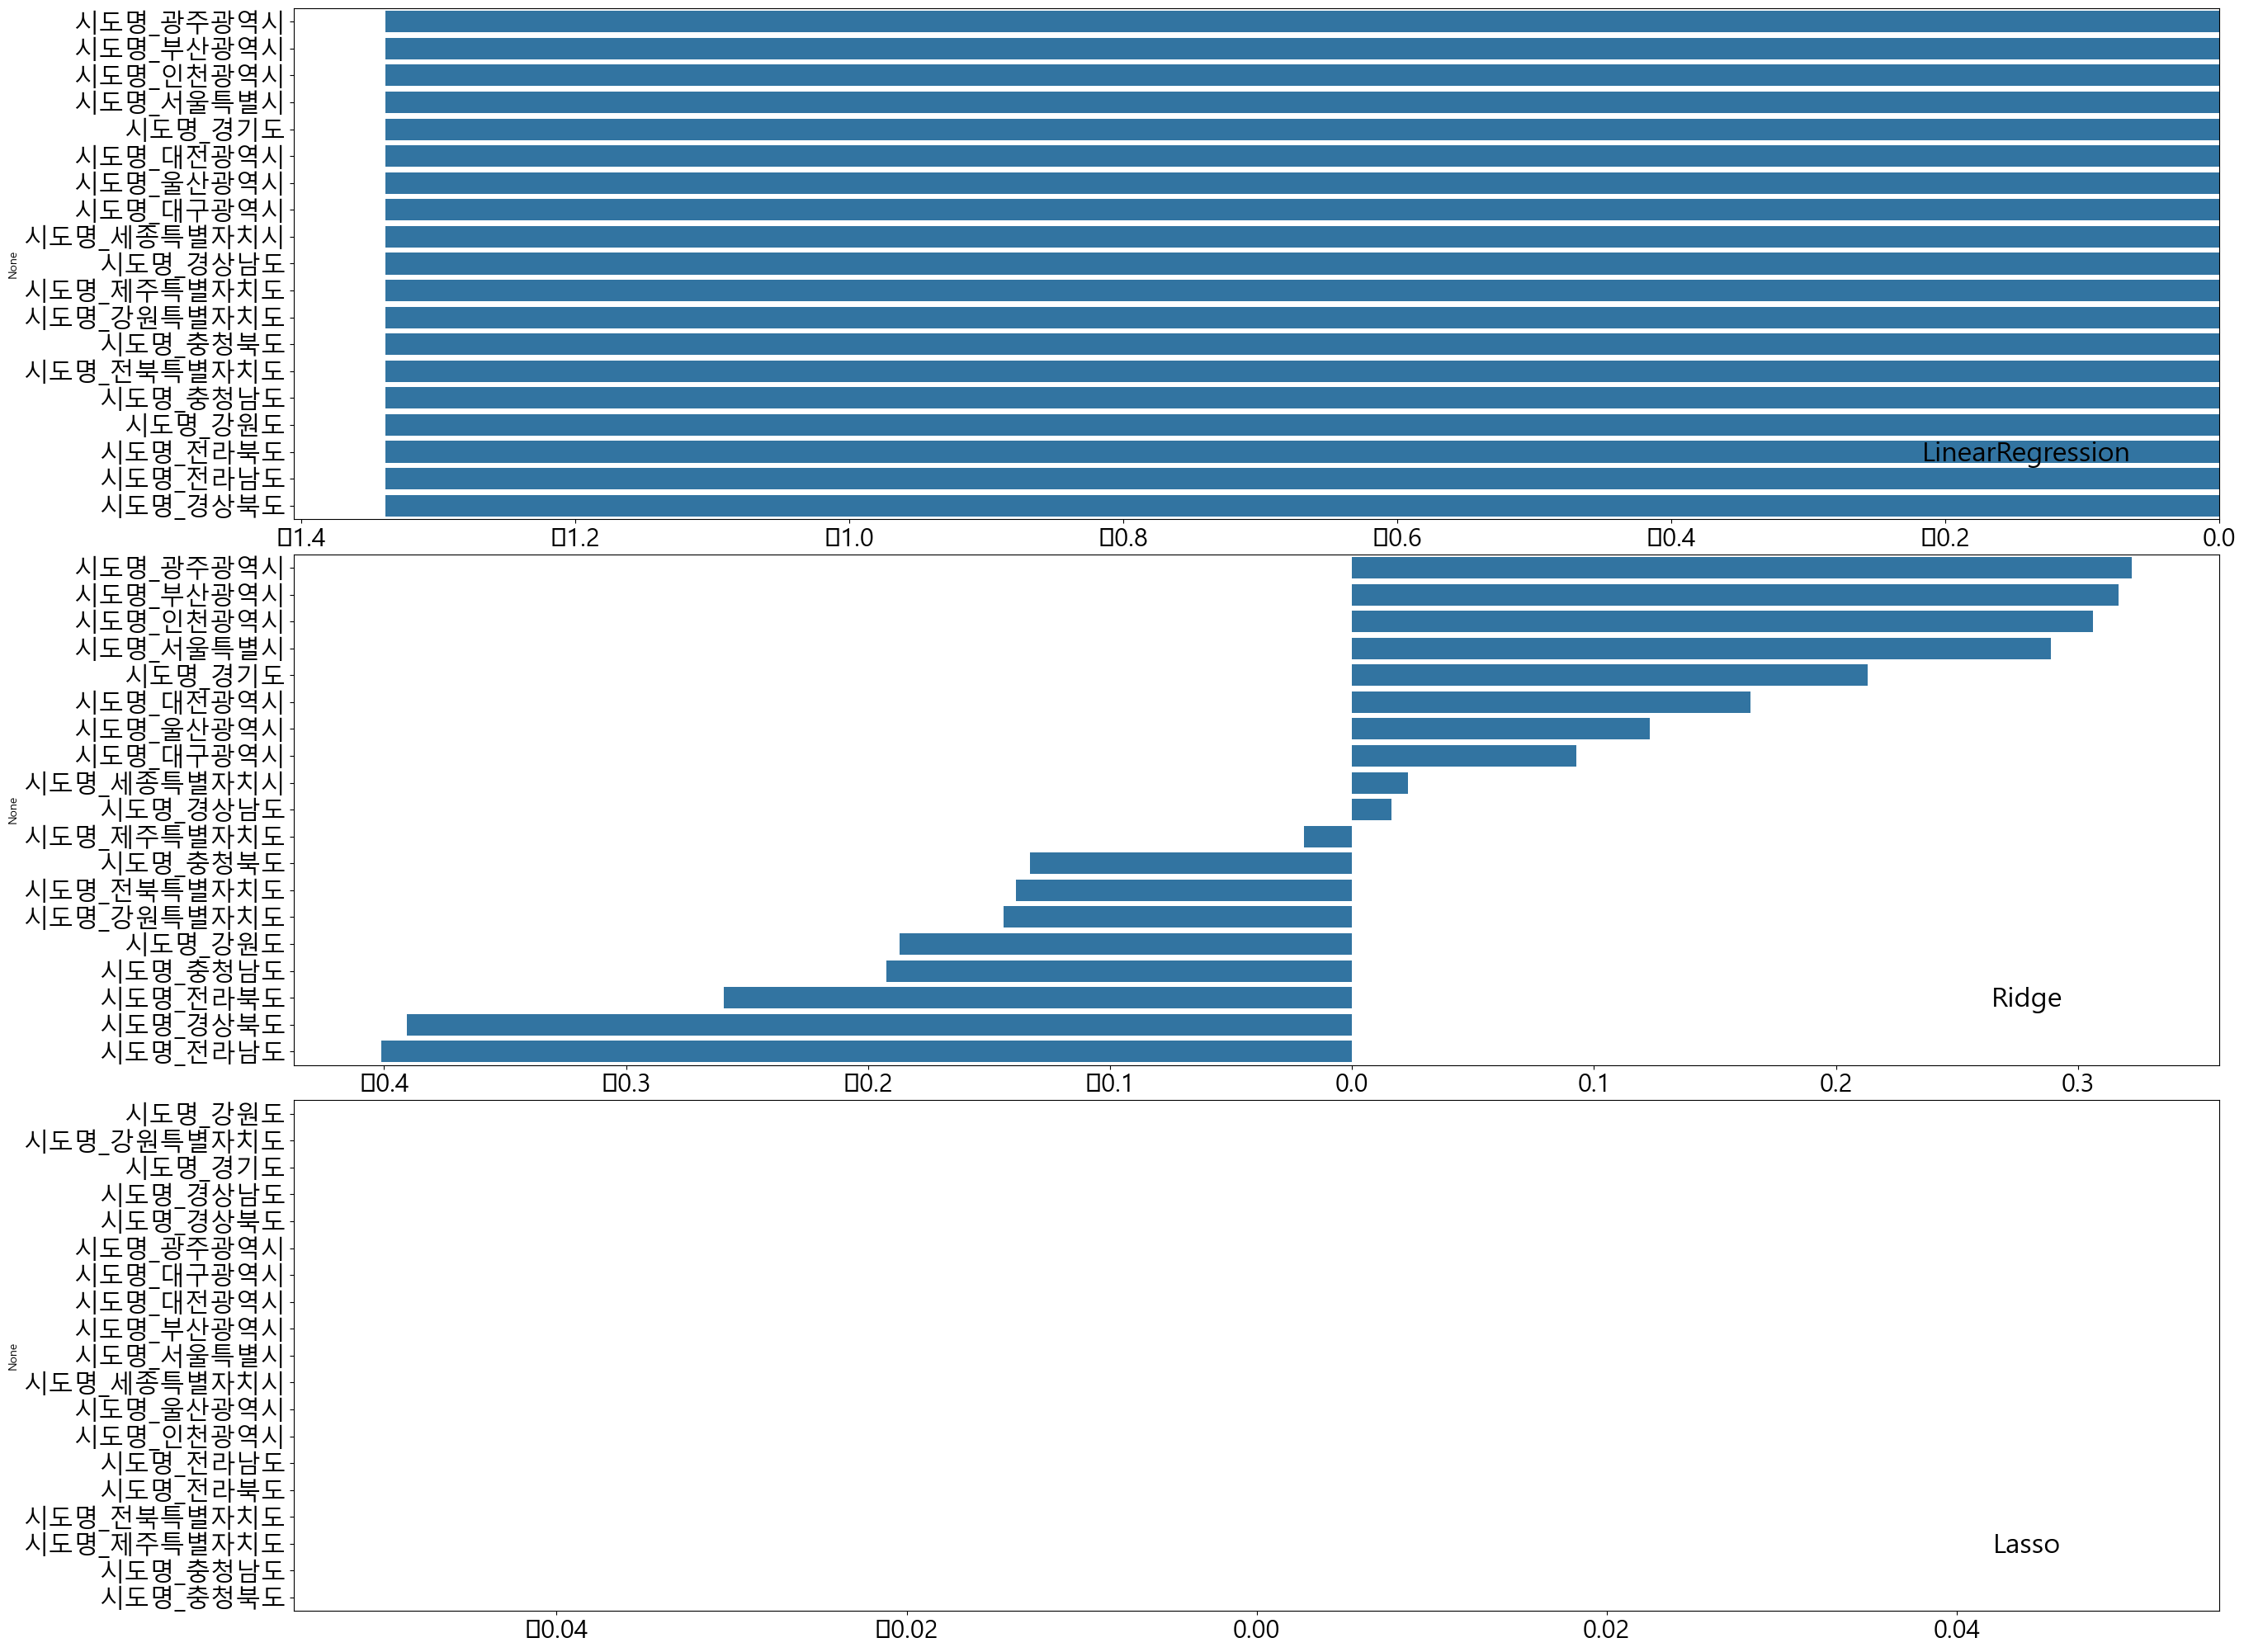

In [163]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [164]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

    for model in models:
        mse_scores = -1*cross_val_score(model, X_features, y_target,
                                        scoring="neg_mean_squared_error", cv=5)
        rmse_scores = np.sqrt(mse_scores)
        rmse_avg = np.mean(rmse_scores)

        print(f"{model.__class__.__name__} CV RMSE 리스트: {np.round(rmse_scores,3)}")
        print(f"{model.__class__.__name__} CV 평균 RMSE: {rmse_avg:.3f}\n")

In [165]:
# LinearRegression, Ridge, Lasso
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)

LinearRegression CV RMSE 리스트: [3.18000000e-01 4.23000000e-01 4.43465259e+12 1.31054104e+12
 4.08000000e-01]
LinearRegression CV 평균 RMSE: 1149038724128.637

Ridge CV RMSE 리스트: [0.318 0.423 0.32  0.35  0.409]
Ridge CV 평균 RMSE: 0.364

Lasso CV RMSE 리스트: [0.367 0.486 0.389 0.431 0.493]
Lasso CV 평균 RMSE: 0.433



In [166]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    model_name = model.__class__.__name__
    grid_cv = GridSearchCV(model, param_grid=params,
                           scoring='neg_mean_squared_error', cv=5)

    grid_cv.fit(X_features, y_target)
    best_rmse = np.sqrt(-1* grid_cv.best_score_)

    print(f'{model_name} GridSearchCV 최적 평균 RMSE: {np.round(best_rmse, 4)}, 최적 alpha:{grid_cv.best_params_}')

    return grid_cv.best_estimator_

In [167]:
# 하이퍼 파라미터
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

# Ridge, Lasso
ridge_reg = Ridge()
lasso_reg = Lasso()

best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge GridSearchCV 최적 평균 RMSE: 0.3664, 최적 alpha:{'alpha': 1}
Lasso GridSearchCV 최적 평균 RMSE: 0.3678, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.3868
Ridge 로그 변환된 RMSE: 0.392
Lasso 로그 변환된 RMSE: 0.3874


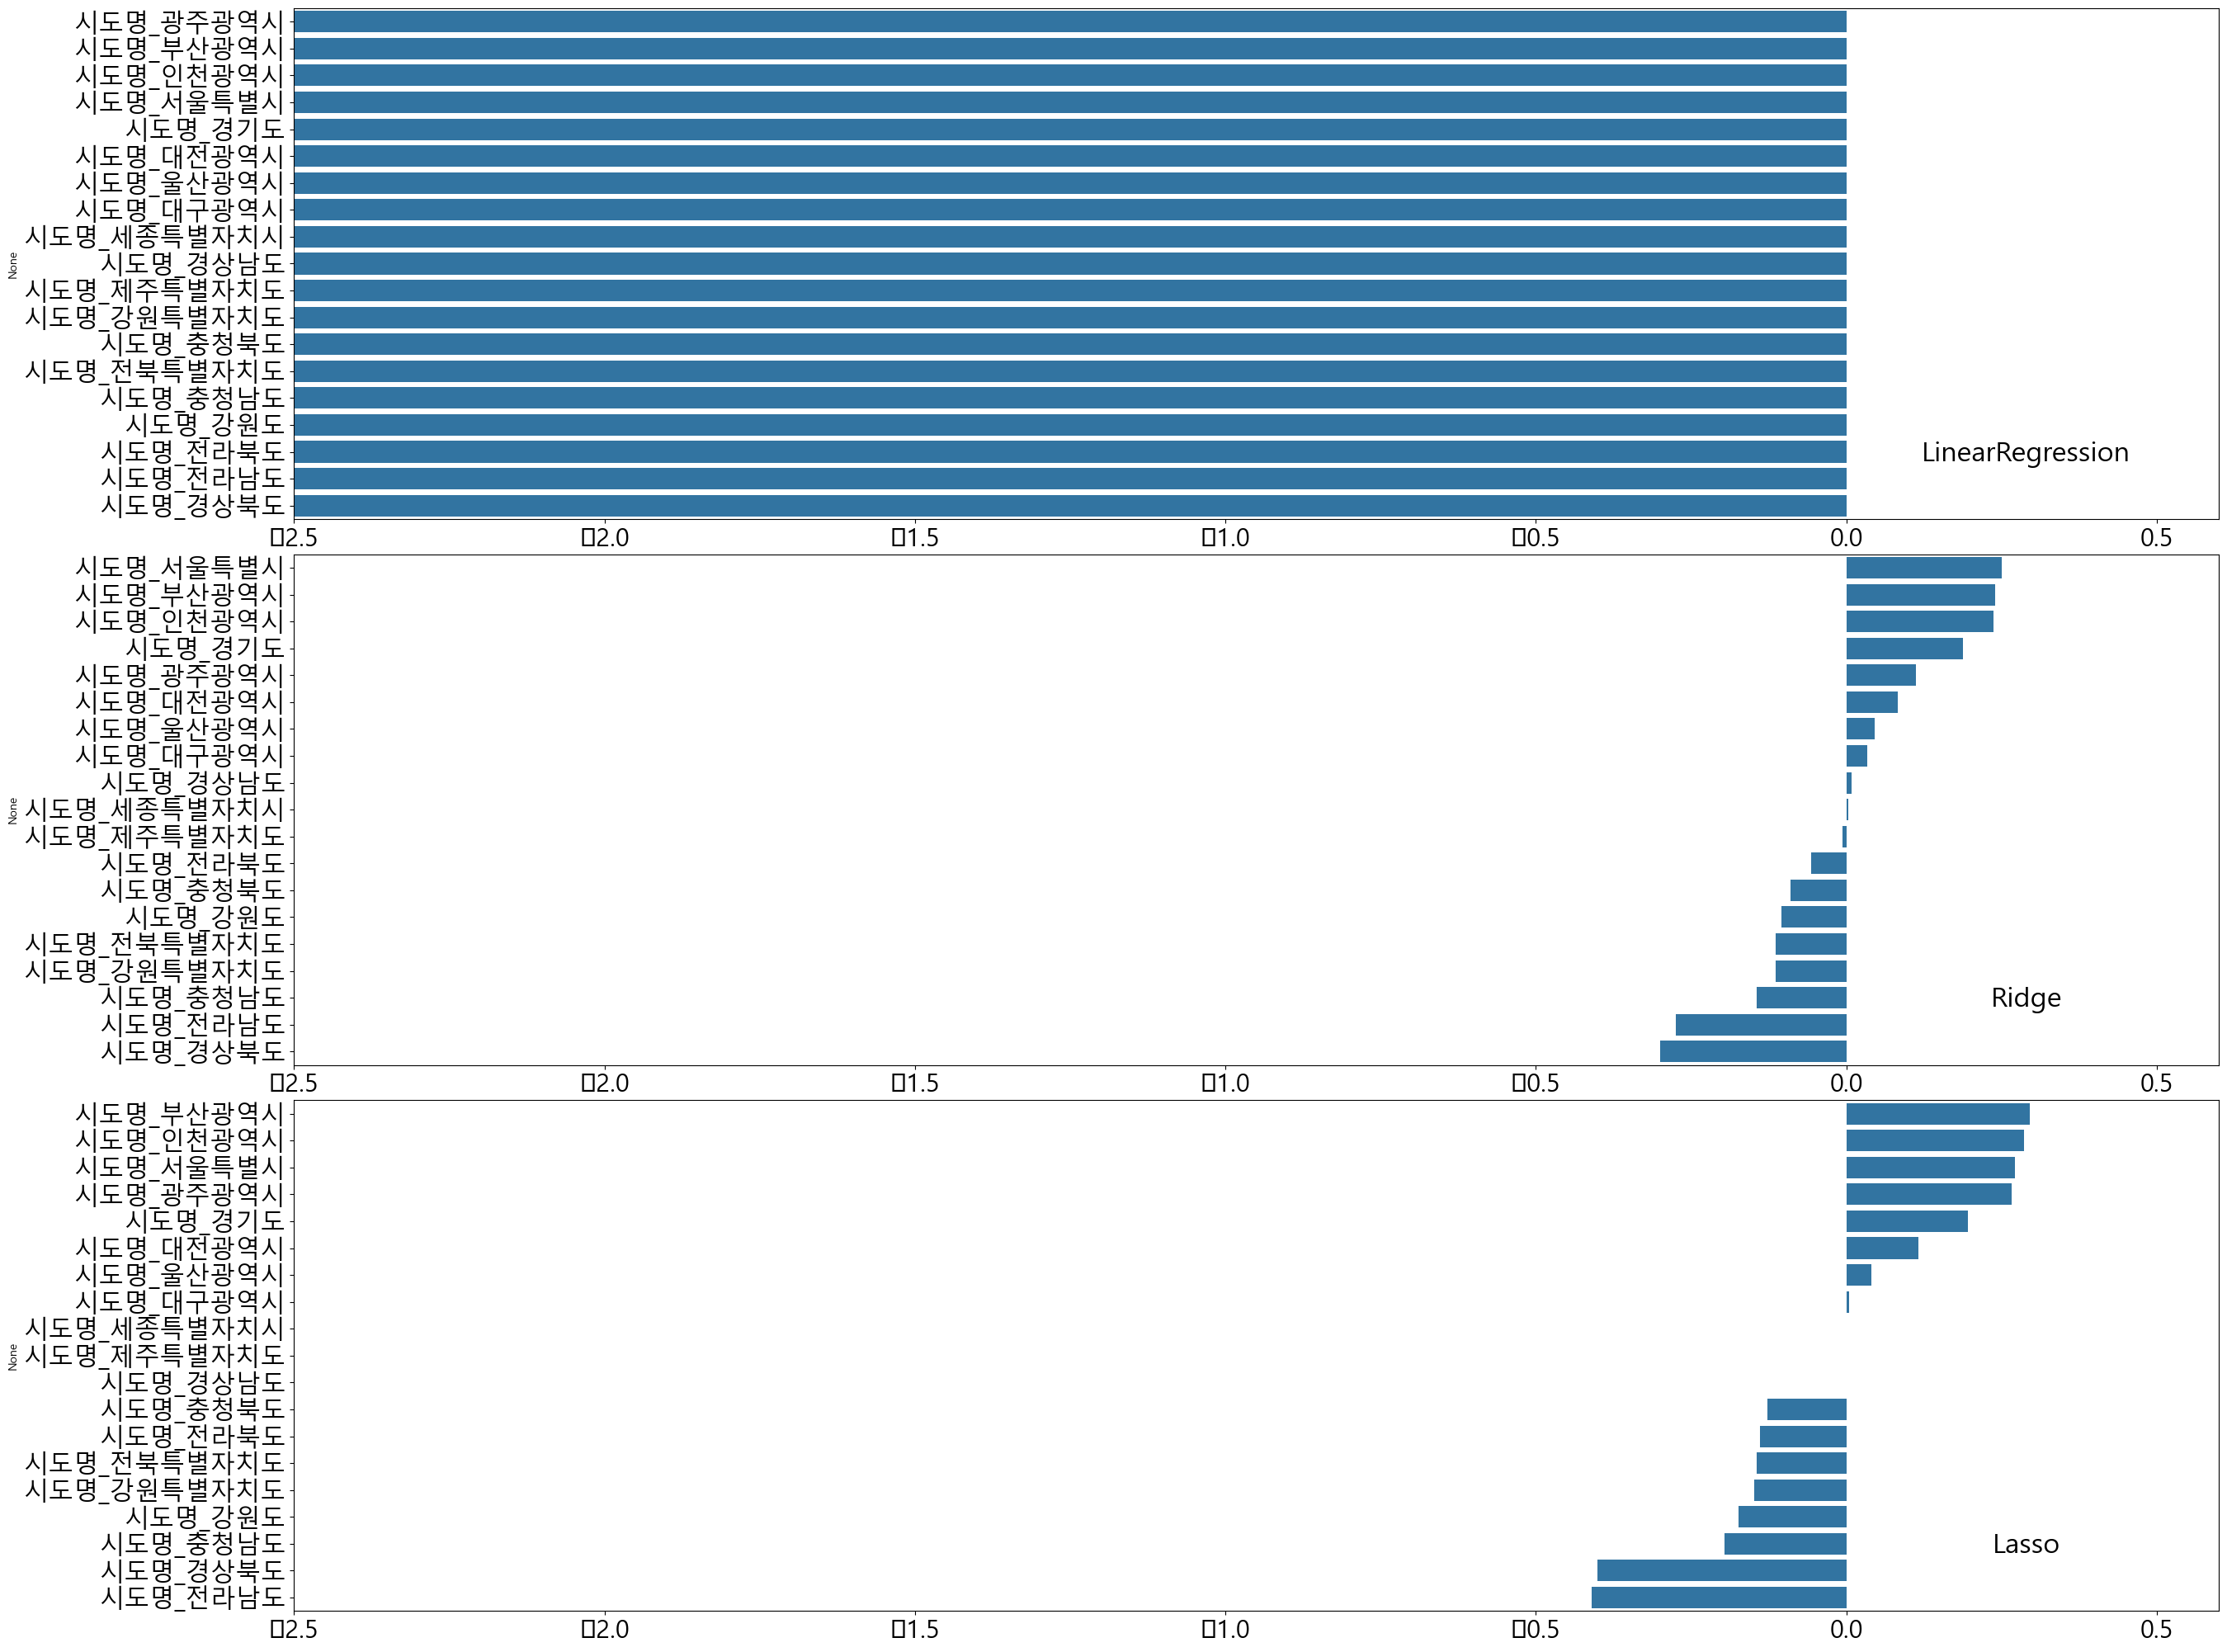

In [168]:
# 최적 하이퍼 파라미터로 Ridge, Lasso 수정
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=12)
lasso_reg = Lasso(alpha=0.001)

lr_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# test set RMSE
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models, xlim=(-2.5,0.6))

In [170]:
from scipy.stats import skew

# 숫자형 피처 컬럼 index
features_index = pay_as_you_go_bag_df.dtypes[pay_as_you_go_bag_df.dtypes != 'object'].index

# 피처(열)별로 왜곡도 산출
skew_features = pay_as_you_go_bag_df[features_index].apply(lambda x : skew(x), axis=0)

# 왜곡도가 1 이상
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

10ℓ가격    1.074727
dtype: float64


In [172]:
# 피처 로그 변환
pay_as_you_go_bag_df[skew_features_top.index] = np.log1p(pay_as_you_go_bag_df[skew_features_top.index])

# 원-핫 인코딩
pay_as_you_go_bag_df_ohe2 = pd.get_dummies(pay_as_you_go_bag_df)

# 데이터 재분리
X_features = pay_as_you_go_bag_df_ohe2.drop('10ℓ가격',axis=1, inplace=False)
y_target = pay_as_you_go_bag_df_ohe2['10ℓ가격']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [173]:
# 하이퍼 파라미터
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

# Ridge, Lasso
ridge_reg = Ridge()
lasso_reg = Lasso()

best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge GridSearchCV 최적 평균 RMSE: 0.0183, 최적 alpha:{'alpha': 1}
Lasso GridSearchCV 최적 평균 RMSE: 0.021, 최적 alpha:{'alpha': 0.001}


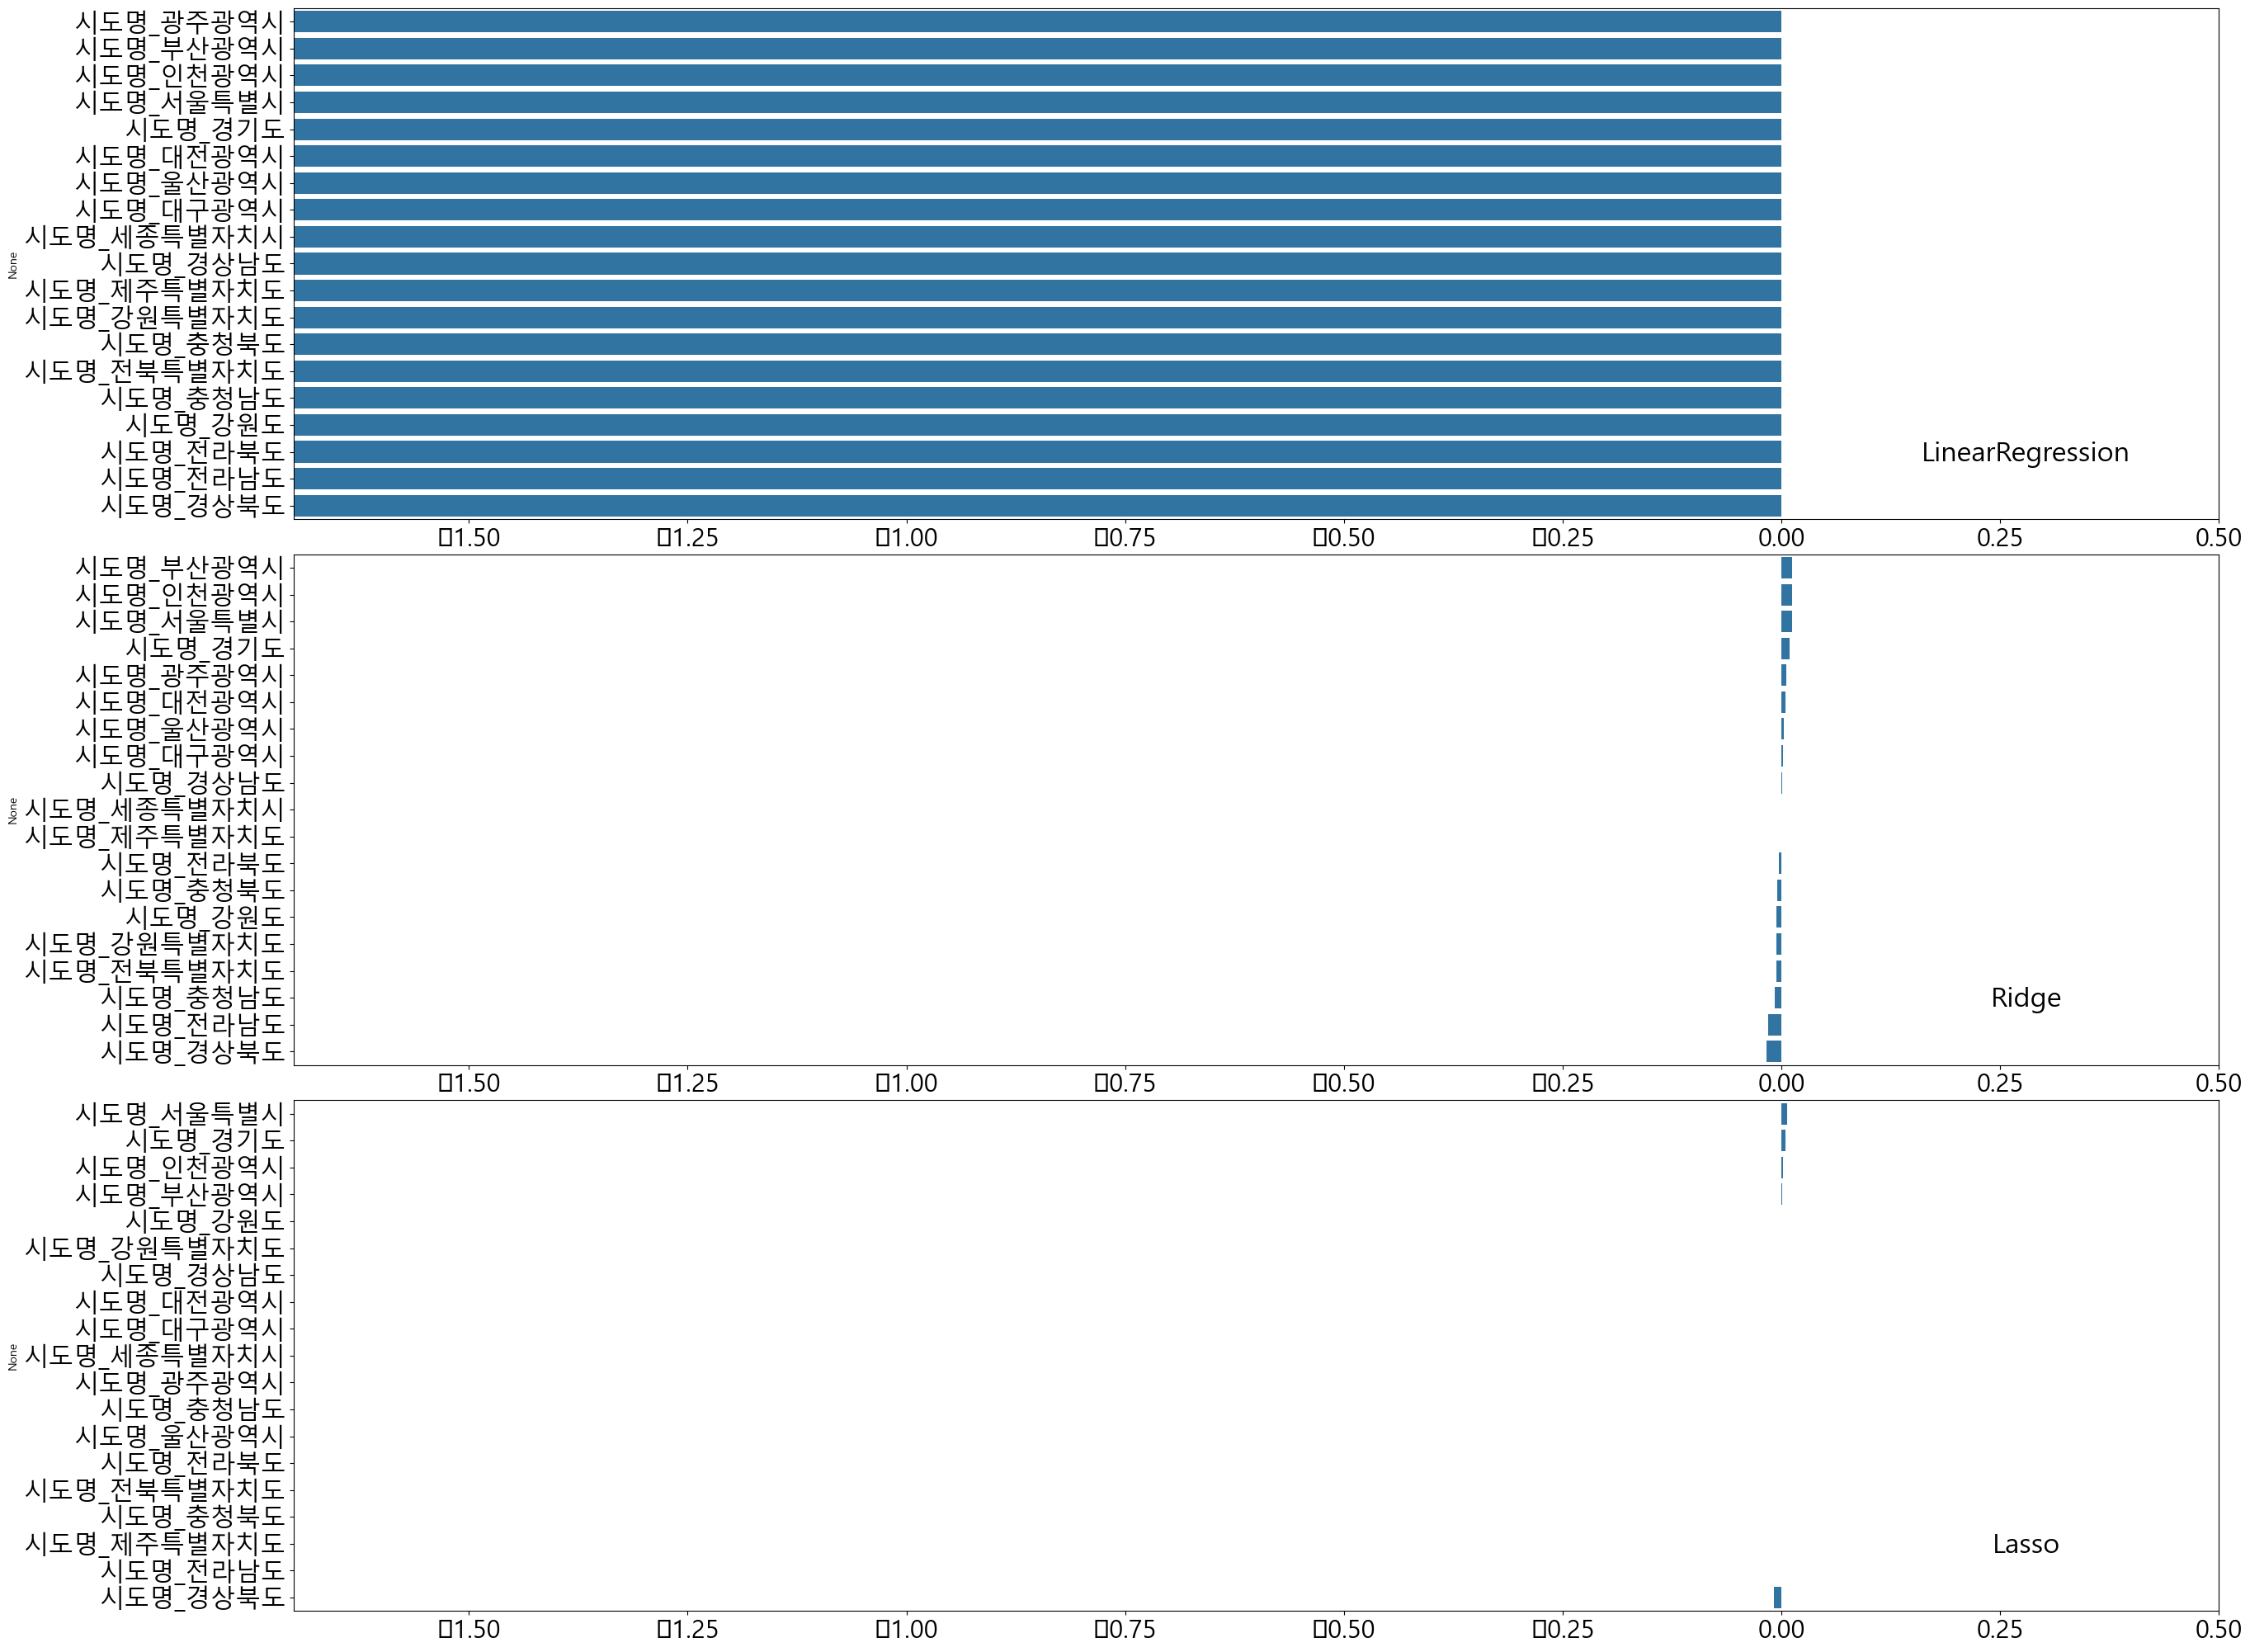

In [174]:
# 최적 하이퍼 파라미터로 Ridge, Lasso 수정
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=12)
lasso_reg = Lasso(alpha=0.001)

lr_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models, xlim=(-1.7,0.5))

TypeError: '>' not supported between instances of 'str' and 'int'

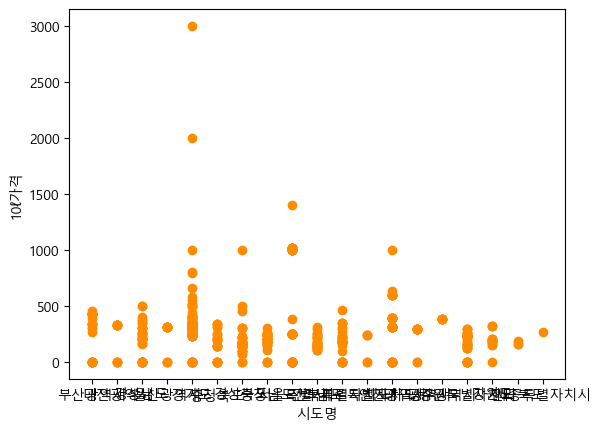

In [180]:
plt.scatter(pay_as_you_go_bag["시도명"] , pay_as_you_go_bag["10ℓ가격"], c="darkorange")
plt.ylabel('10ℓ가격')
plt.xlabel('시도명')

# 추후 확인한 이상치 표시
idx = (pay_as_you_go_bag["시도명"] > 4000) & (pay_as_you_go_bag["10ℓ가격"] < 200000)
outlier_df = pay_as_you_go_bag[idx]
plt.scatter(outlier_df["시도명"] , outlier_df["10ℓ가격"], s=300, c="r", alpha=0.5 )

plt.show()